In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt
import csv
import numpy as np

Using TensorFlow backend.


In [2]:
def load_shadow_train_data(shadow_train_files):
    shadow_train_x = []
    shadow_train_y = []
    for i in range(0,len(shadow_train_files)):
        
        shadow_train_sub = np.loadtxt('model\\'+shadow_train_files[i],delimiter=',')
        shadow_train_sub_x = shadow_train_sub[:,0:10]
        shadow_train_sub_y = shadow_train_sub[:,10]
        shadow_train_sub_x = shadow_train_sub_x.reshape(-1,10)[i*2000:i*2000+4000]
        shadow_train_sub_y = shadow_train_sub_y.reshape(-1,1)[i*2000:i*2000+4000]

        
        if i == 0:
            shadow_train_x = shadow_train_sub_x
            shadow_train_y = shadow_train_sub_y
        else:
            shadow_train_x = np.concatenate((shadow_train_x,shadow_train_sub_x), axis=0)
            shadow_train_y = np.concatenate((shadow_train_y,shadow_train_sub_y), axis=0)
    return shadow_train_x,shadow_train_y

In [3]:
#train_data
shadow_train_files = ['test_shadow1.csv','test_shadow2.csv','test_shadow3.csv','test_shadow4.csv','test_shadow5.csv']
shadow_train_x,shadow_train_y = load_shadow_train_data(shadow_train_files)
print(shadow_train_x.shape)
print(shadow_train_y.shape)

#test_data
shadow_test = np.loadtxt('model\\test_shadow5.csv',delimiter=',')
shadow_test_x = shadow_test[:,0:10]
shadow_test_y = shadow_test[:,10]
shadow_test_x = shadow_test_x.reshape(-1,10)[0000:4000]
shadow_test_y = shadow_test_y.reshape(-1,1)[0000:4000]
print(shadow_test_x.shape)
print(shadow_test_y.shape)

(20000, 10)
(20000, 1)
(4000, 10)
(4000, 1)


In [4]:
# # first train attack_model

# model = Sequential()
# model.add(Dense(16, input_dim=10, activation='relu')) #把dense=1改为20
# model.add(Dropout(0.5))
# model.add(Dense(8,activation='relu')) #没有input 表示隐层神经元
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid')) #输出1维，表示是输出层神经元

# model.compile(loss='binary_crossentropy',
#              optimizer=RMSprop(),
#              metrics=['accuracy']),
# history = model.fit(shadow_train_x, shadow_train_y,nb_epoch=20, batch_size=64,verbose=1)

# # first evaluate attack_model
# score = model.evaluate(shadow_test_x, shadow_test_y,batch_size=64, verbose=1)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])
# predictions = model.predict_classes(shadow_test_x)

# import matplotlib.pyplot as plt
# plt.plot(predictions)

# model.save('model\\attack_model_temp.h5')

In [5]:
#加载attack模型，并用验证集评估
attack_model = load_model('model\\attack_model_temp.h5')
score = attack_model.evaluate(shadow_test_x, shadow_test_y,batch_size=64, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
predictions = attack_model.predict_classes(shadow_test_x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
4000/4000 [==============================] - 0s 27us/step
Test score: 0.6881923270225525
Test accuracy: 0.754


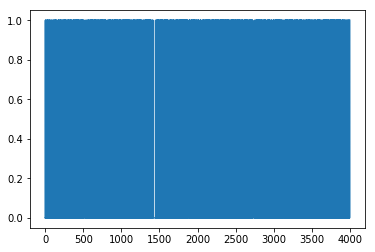

In [6]:
plt.plot(predictions)

In [7]:
def load_mnist_data():
    num_classes = 10
    # input image dimensions
    img_rows, img_cols = 28, 28
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    return x_train,y_train,x_test,y_test

# def load_distillation_data(x_distillation):
    
#     distil_1=[]
#     distil_2=[]
#     distil_3=[]
#     distil_4=[]
#     distil_5=[]
#     distil_6=[]
#     distil_7=[]
#     distil_8=[]
#     distil_9=[]
#     distil_10=[]
#     for i in range(0,len(x_distillation)):
#         index = i % 10
#         if index == 0:
#             distil_1.append(x_distillation[i])
#         elif index == 1:
#             distil_2.append(x_distillation[i])   
#         elif index == 2:
#             distil_3.append(x_distillation[i])
#         elif index == 3:
#             distil_4.append(x_distillation[i])
#         elif index == 4:
#             distil_5.append(x_distillation[i])
#         elif index == 5:
#             distil_6.append(x_distillation[i])   
#         elif index == 6:
#             distil_7.append(x_distillation[i])
#         elif index == 7:
#             distil_8.append(x_distillation[i])
#         elif index == 8:
#             distil_9.append(x_distillation[i])            
#         elif index == 9:
#             distil_10.append(x_distillation[i])   

#     return  distil_1,distil_2,distil_3,distil_4,distil_5,distil_6,distil_7,distil_8,distil_9,distil_10

def load_distillation_data(x_distillation):
    
    distil=[]
    for i in range(0,10):
        distil.append([])
    for i in range(0,len(x_distillation)):
        index = i % 10
        distil[index].append(x_distillation[i])
    return  distil

In [8]:
x_train,y_train,x_test,y_test = load_mnist_data()
x_distillation = np.concatenate((x_train,x_test), axis=0)
print('x_distillation shape:', x_distillation.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_distillation shape: (70000, 28, 28, 1)


In [9]:
#加载蒸馏数据
distil_data = load_distillation_data(x_distillation)

print(len(distil_data))
print(len(distil_data[0]))

distil_data = np.array(distil_data)
print(type(distil_data[0]))

10
7000
<class 'numpy.ndarray'>


In [10]:
#步骤6，过一遍target得到软标签
target_model = load_model('model\\model_target.h5')

In [11]:
#distiul_index max = 9
distil_index = 1

In [12]:
feature_membership_temp = target_model.predict(distil_data[distil_index],verbose=1)

7000/7000 [==============================] - 5s 661us/step


In [13]:
label_membership_temp = np.ones((2000,1))
label_membership_temp = np.concatenate((label_membership_temp,np.zeros((5000,1))), axis=0)
print(label_membership_temp.shape)

(7000, 1)


In [14]:
#步骤7、8，将得到的软标签过一遍attack得到第二标签
score = attack_model.evaluate(feature_membership_temp,label_membership_temp,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predict_membership_temp = attack_model.predict_classes(feature_membership_temp,verbose=1)
print(label_membership_temp)

7000/7000 [==============================] - 0s 16us/step
Test loss: 0.6911603121757507
Test accuracy: 0.5977142856461661
7000/7000 [==============================] - 0s 9us/step
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [15]:
confus = {'tp':0,'fp':0,'tn':0,'fn':0}

ori_membership_temp_positive = []
feature_membership_temp_positive = []
predict_membership_temp_positive = []

for i in range(0,len(label_membership_temp)):
    if predict_membership_temp[i] == 1:
        ori_membership_temp_positive.append(distil_data[0][i])
        feature_membership_temp_positive.append(feature_membership_temp[i])
        predict_membership_temp_positive.append(label_membership_temp[i])
        if label_membership_temp[i] == 1:
            confus['tp'] += 1
        elif label_membership_temp[i] == 0:
            confus['fp'] += 1
    elif predict_membership_temp[i] == 0:
        if label_membership_temp[i] == 1:
            confus['tn'] += 1
        elif label_membership_temp[i] == 0:
            confus['fn'] += 1
            
ori_membership_temp_positive = np.array(ori_membership_temp_positive)
feature_membership_temp_positive = np.array(feature_membership_temp_positive)
predict_membership_temp_positive = np.array(predict_membership_temp_positive)

In [16]:
print(ori_membership_temp_positive.shape)
print(feature_membership_temp_positive.shape)
print(predict_membership_temp_positive.shape)
print(confus)

(1878, 28, 28, 1)
(1878, 10)
(1878, 1)
{'tp': 531, 'fp': 1347, 'fn': 3653, 'tn': 1469}


In [17]:
#步骤1，feature_membership_temp_positive就是第二标签为1的数据过一遍target得到软标签
ones_menbership_temp_positive = np.ones((len(feature_membership_temp_positive),1))

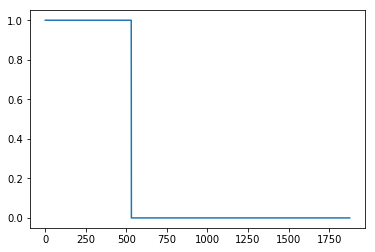

In [18]:
plt.plot(predict_membership_temp_positive)

In [19]:
def load_shadow_model(root,shadows):
    shadow_models=[]
    for shadow in shadows:
        path = root + shadow
        model = load_model(path)
        shadow_models.append(model)
    return shadow_models

In [20]:
#步骤2，加入数据继续训练5个shadow模型

In [21]:
root = 'model\\'
shadows_list = ['shadow1_T_1.h5','shadow2_T_1.h5','shadow3_T_1.h5','shadow4_T_1.h5','shadow5_T_1.h5']

In [22]:
models = load_shadow_model(root,shadows_list)

In [23]:
ori_membership_temp_positive = ori_membership_temp_positive.reshape(-1,28 * 28)
for i in range(0,len(models)):
    models[i].fit(ori_membership_temp_positive,feature_membership_temp_positive,batch_size = 64,epochs = 100,verbose=1)
#     models[i].save(root+shadows_list[i])

Epoch 1/100
1878/1878 [==============================] - 1s 296us/step - loss: 2.8529 - acc: 0.2812
Epoch 2/100
1878/1878 [==============================] - 0s 233us/step - loss: 1.1375 - acc: 0.3669
Epoch 3/100
1878/1878 [==============================] - 0s 209us/step - loss: 1.0873 - acc: 0.4191
Epoch 4/100
1878/1878 [==============================] - 0s 191us/step - loss: 1.0739 - acc: 0.4340
Epoch 5/100
1878/1878 [==============================] - 0s 191us/step - loss: 1.0429 - acc: 0.4531
Epoch 6/100
1878/1878 [==============================] - 0s 192us/step - loss: 1.0181 - acc: 0.4867
Epoch 7/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.9817 - acc: 0.5208
Epoch 8/100
1878/1878 [==============================] - 0s 197us/step - loss: 0.9328 - acc: 0.5644
Epoch 9/100
1878/1878 [==============================] - 0s 195us/step - loss: 0.8874 - acc: 0.5873
Epoch 10/100
1878/1878 [==============================] - 0s 192us/step - loss: 0.8573 - acc: 0.6017

1878/1878 [==============================] - 0s 183us/step - loss: 0.0450 - acc: 0.9894
Epoch 82/100
1878/1878 [==============================] - 0s 203us/step - loss: 0.0461 - acc: 0.9894
Epoch 83/100
1878/1878 [==============================] - 0s 233us/step - loss: 0.0411 - acc: 0.9909
Epoch 84/100
1878/1878 [==============================] - 0s 233us/step - loss: 0.0320 - acc: 0.9941
Epoch 85/100
1878/1878 [==============================] - 0s 258us/step - loss: 0.0336 - acc: 0.9925
Epoch 86/100
1878/1878 [==============================] - 0s 238us/step - loss: 0.0423 - acc: 0.9909
Epoch 87/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.0378 - acc: 0.9899
Epoch 88/100
1878/1878 [==============================] - 0s 241us/step - loss: 0.0430 - acc: 0.9894
Epoch 89/100
1878/1878 [==============================] - 0s 227us/step - loss: 0.0325 - acc: 0.9957
Epoch 90/100
1878/1878 [==============================] - 0s 216us/step - loss: 0.0306 - acc: 0.9952
Epo

1878/1878 [==============================] - 0s 216us/step - loss: 0.0585 - acc: 0.9830
Epoch 63/100
1878/1878 [==============================] - 0s 204us/step - loss: 0.0565 - acc: 0.9835
Epoch 64/100
1878/1878 [==============================] - 0s 196us/step - loss: 0.0534 - acc: 0.9846
Epoch 65/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.0559 - acc: 0.9846
Epoch 66/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.0524 - acc: 0.9888
Epoch 67/100
1878/1878 [==============================] - 0s 203us/step - loss: 0.0561 - acc: 0.9867
Epoch 68/100
1878/1878 [==============================] - 0s 201us/step - loss: 0.0503 - acc: 0.9851
Epoch 69/100
1878/1878 [==============================] - 0s 202us/step - loss: 0.0442 - acc: 0.9931
Epoch 70/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.0516 - acc: 0.9867
Epoch 71/100
1878/1878 [==============================] - 0s 195us/step - loss: 0.0462 - acc: 0.9899
Epo

1878/1878 [==============================] - 0s 220us/step - loss: 0.1091 - acc: 0.9649
Epoch 44/100
1878/1878 [==============================] - 0s 210us/step - loss: 0.1093 - acc: 0.9696
Epoch 45/100
1878/1878 [==============================] - 0s 212us/step - loss: 0.1072 - acc: 0.9675
Epoch 46/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.0979 - acc: 0.9718
Epoch 47/100
1878/1878 [==============================] - 0s 203us/step - loss: 0.1009 - acc: 0.9707
Epoch 48/100
1878/1878 [==============================] - 0s 211us/step - loss: 0.0898 - acc: 0.9734
Epoch 49/100
1878/1878 [==============================] - 0s 203us/step - loss: 0.0891 - acc: 0.9766
Epoch 50/100
1878/1878 [==============================] - 0s 199us/step - loss: 0.0926 - acc: 0.9728
Epoch 51/100
1878/1878 [==============================] - 0s 208us/step - loss: 0.0768 - acc: 0.9824
Epoch 52/100
1878/1878 [==============================] - 0s 211us/step - loss: 0.0825 - acc: 0.9755
Epo

1878/1878 [==============================] - 0s 201us/step - loss: 0.3149 - acc: 0.8845
Epoch 25/100
1878/1878 [==============================] - 0s 209us/step - loss: 0.3006 - acc: 0.8940
Epoch 26/100
1878/1878 [==============================] - 0s 202us/step - loss: 0.2638 - acc: 0.9105
Epoch 27/100
1878/1878 [==============================] - 0s 202us/step - loss: 0.2573 - acc: 0.9132
Epoch 28/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.2493 - acc: 0.9143
Epoch 29/100
1878/1878 [==============================] - 0s 209us/step - loss: 0.2185 - acc: 0.9244
Epoch 30/100
1878/1878 [==============================] - 0s 194us/step - loss: 0.2193 - acc: 0.9217
Epoch 31/100
1878/1878 [==============================] - 0s 203us/step - loss: 0.1913 - acc: 0.9334
Epoch 32/100
1878/1878 [==============================] - 0s 204us/step - loss: 0.1835 - acc: 0.9452
Epoch 33/100
1878/1878 [==============================] - 0s 204us/step - loss: 0.1770 - acc: 0.9404
Epo

1878/1878 [==============================] - 0s 203us/step - loss: 1.0400 - acc: 0.4569
Epoch 6/100
1878/1878 [==============================] - 0s 200us/step - loss: 1.0082 - acc: 0.4973
Epoch 7/100
1878/1878 [==============================] - 0s 205us/step - loss: 0.9778 - acc: 0.5117
Epoch 8/100
1878/1878 [==============================] - 0s 202us/step - loss: 0.9383 - acc: 0.5442
Epoch 9/100
1878/1878 [==============================] - 0s 235us/step - loss: 0.9128 - acc: 0.5703
Epoch 10/100
1878/1878 [==============================] - 0s 207us/step - loss: 0.8817 - acc: 0.5921
Epoch 11/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.8343 - acc: 0.6273
Epoch 12/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.7953 - acc: 0.6374
Epoch 13/100
1878/1878 [==============================] - 0s 204us/step - loss: 0.7633 - acc: 0.6635
Epoch 14/100
1878/1878 [==============================] - 0s 200us/step - loss: 0.7243 - acc: 0.6933
Epoch 1

1878/1878 [==============================] - 0s 194us/step - loss: 0.0373 - acc: 0.9931
Epoch 87/100
1878/1878 [==============================] - 0s 205us/step - loss: 0.0425 - acc: 0.9888
Epoch 88/100
1878/1878 [==============================] - 0s 193us/step - loss: 0.0353 - acc: 0.9915
Epoch 89/100
1878/1878 [==============================] - 0s 196us/step - loss: 0.0436 - acc: 0.9894
Epoch 90/100
1878/1878 [==============================] - 0s 206us/step - loss: 0.0330 - acc: 0.9931
Epoch 91/100
1878/1878 [==============================] - 0s 226us/step - loss: 0.0410 - acc: 0.9872
Epoch 92/100
1878/1878 [==============================] - 0s 215us/step - loss: 0.0406 - acc: 0.9878
Epoch 93/100
1878/1878 [==============================] - 0s 240us/step - loss: 0.0391 - acc: 0.9915
Epoch 94/100
1878/1878 [==============================] - 0s 222us/step - loss: 0.0385 - acc: 0.9909
Epoch 95/100
1878/1878 [==============================] - 0s 230us/step - loss: 0.0370 - acc: 0.9920
Epo

In [28]:
#3、4 用测试数据分别过一遍5个shadow，并贴标签用作attack模型的训练
x_train,y_train,x_test,y_test = load_mnist_data()
start_indexs = [0,2000,4000,6000,8000]

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [29]:
#生成5个shadow测试数据的ori,
shadow_x_ori = []
shadow_y_ori = []

for start_index in start_indexs:
    shadow_x_ori_sub = x_train[start_index:start_index + 2000]
    for i in range(1,6):
        left = i * 10000 + start_index
        shadow_x_ori_sub = np.concatenate((shadow_x_ori_sub,x_train[left:left + 2000]), axis=0)
    shadow_x_ori_sub = np.concatenate((shadow_x_ori_sub,x_test[start_index:start_index + 2000]), axis=0)
    shadow_x_ori.append(shadow_x_ori_sub)
    
    shadow_y_ori_sub = y_train[start_index:start_index + 2000]
    for i in range(1,6):
        left = i * 10000 + start_index
        shadow_y_ori_sub = np.concatenate((shadow_y_ori_sub,y_train[left:left + 2000]), axis=0)
    shadow_y_ori_sub = np.concatenate((shadow_y_ori_sub,y_test[start_index:start_index + 2000]), axis=0)
    shadow_y_ori.append(shadow_test_y)

In [30]:
print(shadow_x_ori[0].shape)

(14000, 28, 28, 1)


In [31]:
#5再次训练attack模型

In [32]:
def load_shadow_train_data(shadow_x):
    shadow_train_x = []
    shadow_train_y = []
    for i in range(0,len(shadow_x)):
        
        shadow_train_sub_x = shadow_x[i][i*2000:i*2000+4000]
        shadow_train_sub_y = np.zeros((2000,1))
        shadow_train_sub_y = np.concatenate((shadow_train_sub_y,np.ones((2000,1))), axis=0)

        if i == 0:
            shadow_train_x = shadow_train_sub_x
            shadow_train_y = shadow_train_sub_y
        else:
            shadow_train_x = np.concatenate((shadow_train_x,shadow_train_sub_x), axis=0)
            
            shadow_train_sub_y = np.zeros((2000,1))
            shadow_train_sub_y = np.concatenate((shadow_train_sub_y,np.ones((2000,1))), axis=0)
            shadow_train_y = np.concatenate((shadow_train_y,shadow_train_sub_y), axis=0)
    return shadow_train_x,shadow_train_y

In [33]:
shadow_train_x,shadow_train_y = load_shadow_train_data(shadow_x_ori)

In [34]:
shadow_train_x = target_model.predict(shadow_train_x,verbose=1)

20000/20000 [==============================] - 13s 652us/step


(20000, 10)
(20000, 1)


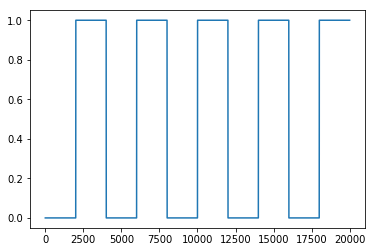

In [35]:
print(shadow_train_x.shape)
print(shadow_train_y.shape)
plt.plot(shadow_train_y)

In [36]:
attack_model.fit(shadow_train_x, shadow_train_y,nb_epoch=20, batch_size=64,verbose=1)

D:\Anaconda3\envs\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
20000/20000 [==============================] - 1s 27us/step - loss: 0.6931 - acc: 0.5056
Epoch 2/20
20000/20000 [==============================] - 0s 14us/step - loss: 0.6933 - acc: 0.5024
Epoch 3/20
20000/20000 [==============================] - 0s 15us/step - loss: 0.6933 - acc: 0.4993
Epoch 4/20
20000/20000 [==============================] - 0s 15us/step - loss: 0.6932 - acc: 0.5036
Epoch 5/20
20000/20000 [==============================] - 0s 14us/step - loss: 0.6932 - acc: 0.5010
Epoch 6/20
20000/20000 [==============================] - 0s 15us/step - loss: 0.6932 - acc: 0.4988
Epoch 7/20
20000/20000 [==============================] - 0s 19us/step - loss: 0.6932 - acc: 0.4955
Epoch 8/20
20000/20000 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.4997
Epoch 9/20
20000/20000 [==============================] - 0s 19us/step - loss: 0.6932 - acc: 0.4977
Epoch 10/20
20000/20000 [==============================] - 0s 14us/step - loss: 0.6931 - acc: 0.5016

In [37]:
#模型评估,修改中

In [38]:
x_train,y_train,x_test,y_test = load_mnist_data()

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [39]:
#选择测试集
start_index = 8000
shadow_test_x = x_train[start_index:start_index + 2000]
for i in range(1,6):
    left = i * 10000 + start_index
    shadow_test_x = np.concatenate((shadow_test_x,x_train[left:left + 2000]), axis=0)
shadow_test_x = np.concatenate((shadow_test_x,x_test[start_index:start_index + 2000]), axis=0)

shadow_test_y = y_train[start_index:start_index + 2000]
for i in range(1,6):
    left = i * 10000 + start_index
    shadow_test_y = np.concatenate((shadow_test_y,y_train[left:left + 2000]), axis=0)
shadow_test_y = np.concatenate((shadow_test_y,y_test[start_index:start_index + 2000]), axis=0)

In [40]:
shadow_label = np.ones((2000,1))
shadow_label = np.concatenate((shadow_label,np.zeros((12000,1))), axis=0)

In [41]:
last_x = target_model.predict(shadow_test_x,verbose=1)

14000/14000 [==============================] - 9s 632us/step


In [55]:
score = attack_model.evaluate(last_x[0000:4000],shadow_label[0000:4000],verbose=1)

4000/4000 [==============================] - 0s 20us/step


In [56]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6931460270881653
Test accuracy: 0.50225


In [44]:
predict = attack_model.predict_classes(last_x,verbose=1)

14000/14000 [==============================] - 0s 11us/step


In [45]:
print(predict)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


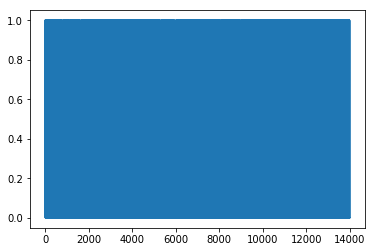

In [46]:
plt.plot(predict)